In [1]:
# Mounting colab at drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip 'gdrive/MyDrive/Twitter Sentiment Analysis/archive.zip'

Archive:  gdrive/MyDrive/Twitter Sentiment Analysis/archive.zip
  inflating: sentiment_tweets3.csv   


In [3]:
# Importing Libraries
import numpy as np
import pandas as pd

In [4]:
# Importing dataset
df = pd.read_csv('sentiment_tweets3.csv')

In [5]:
df.head(15)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


In [6]:
# Getting shape of dataset: (rows x columns)
df.shape

(10314, 3)

In [7]:
# Dropping Unwanted columns
df = df.drop('Index', axis = 1)

In [8]:
# New shape of dataset
df.shape

(10314, 2)

In [9]:
# Changing column name
df.columns = ['Tweets', 'Polarity']
df.head(15)

,Tweets,Polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,so sleepy. good times tonight though,0
6,"@SilkCharm re: #nbn as someone already said, d...",0
7,23 or 24ï¿½C possible today. Nice,0
8,nite twitterville workout in the am -ciao,0
9,"@daNanner Night, darlin'! Sweet dreams to you",0


In [10]:
# Checking for missing values
df.isna().sum()

Tweets      0
Polarity    0
dtype: int64

In [11]:
# We see that there are no missing values thus we carry on with the preprocessing

# Preprocess data
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy

nltk.download('stopwords')

# Convert Text to lower case
df['Tweets'] = df['Tweets'].str.strip().str.lower()

# Initialize Spacy 'en' model
nlp = spacy.load('en', disable = ['parser', 'ner'])

# Remove usernames and links
def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    return tweet

df['Tweets'] = df['Tweets'].apply(remove_usernames_links)

# Remove punctuations
def remove_punctuation(tweet):
  tweet = re.sub('[^\w\s]', '', tweet)
  return tweet

df['Tweets'] = df['Tweets'].apply(remove_punctuation)

# Remove Stopwords
stop = stopwords.words('english')
df['Tweets'] = df['Tweets'].apply(lambda x: " ".join(x for x in x.split(' ') if x not in stop))

# Lemmatization
def space(comment):
  doc = nlp(comment)
  return " ".join([token.lemma_ for token in doc])

df['Tweets'] = df['Tweets'].apply(space)

df.head(15)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Tweets,Polarity
0,real good moment missssssssss much,0
1,read manga,0
2,,0
3,need send -PRON- accountant tomorrow oddly b...,0
4,add myspace myspacecomlookthunder,0
5,sleepy good time tonight though,0
6,nbn someone already say fiber home mean leas...,0
7,23 24ï½c possible today nice,0
8,nite twitterville workout ciao,0
9,night darlin sweet dream,0


In [12]:
# Outputting last 15 rows with df.tail()
df.tail(15)

,Tweets,Polarity
10299,engage physical activity decrease people chanc...,1
10300,depression -PRON- be always u darling,1
10301,-PRON- be suffer depression -PRON- be thankful...,1
10302,one 20 us child teen anxiety depression,1
10303,-PRON- be go see next week chicago -PRON- be...,1
10304,reagan bush 43 trump gop use maga slogan r...,1
10305,rt depression could improve vitamin deficiency...,1
10306,actor symptom adult depression naked gteen por...,1
10307,bharatu may book court law provoke s...,1
10308,many sufferer depression be not sad feel nothi...,1


In [13]:
# Again checking for invalid rows
(df['Tweets'] == '').sum()

25

In [14]:
df.shape

(10314, 2)

In [15]:
# Checking for rows containing just numbers
def remove_numbers(tweet):
  if tweet.isdigit():
    tweet = ''

  return tweet

df['Tweets'] = df['Tweets'].apply(remove_numbers)

(df['Tweets'] == '').sum()

31

In [16]:
# Thus we see that we have 25 null strings + 6 more that had rows with just numbers and hence we must drop them
# This will change the shape of our dataset to (10283, 2)

# Dropping empty strings
nan_value = float("NaN")
df. replace('', nan_value, inplace=True)
df = df.dropna(axis = 0)
df.shape

(10283, 2)

In [17]:
# Split into training and testing dataset
from sklearn.model_selection import train_test_split

x = df['Tweets']
y = df['Polarity']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42, shuffle = True)

In [18]:
print('Xtrain: ', X_train.shape, 'Ytrain: ', Y_train.shape)
print('Xtest: ', X_test.shape, 'Ytest: ', Y_test.shape)

Xtrain:  (8226,) Ytrain:  (8226,)
Xtest:  (2057,) Ytest:  (2057,)


In [20]:
print(Y_train.value_counts())
print(Y_test.value_counts())

0    6380
1    1846
Name: Polarity, dtype: int64
0    1595
1     462
Name: Polarity, dtype: int64


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text reviews to encoded numbers
vector = CountVectorizer(stop_words = 'english')
X_train = vector.fit_transform(X_train).toarray()
X_test = vector.transform(X_test).toarray()

In [22]:
# Model Generation

# Multinomial NB
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(X_train, Y_train)

MultinomialNB()

In [23]:
# Evaluating Training score
model1.score(X_train, Y_train)

0.9912472647702407

In [24]:
# Function to generate metrics
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)
    return true_pos, true_neg, false_pos, false_neg, accuracy, precision, recall, Fscore

In [25]:
# Testing our own calculations
predictions1 = model1.predict(X_test)
true_pos1, true_neg1, false_pos1, false_neg1, a1, p1, r1, f1 = metrics(Y_test, predictions1)

print("Accuracy: ", a1)
print("Precision: ", p1)
print("Recall: ", r1)
print("F-score: ", f1)

Accuracy:  0.9795819154107924
Precision:  0.9356846473029046
Recall:  0.9761904761904762
F-score:  0.9555084745762712


In [33]:
# Print Confusion Matrix
matrix1 = np.zeros((2, 2))
matrix1[0, 0] = int(true_neg1)
matrix1[0, 1] = int(false_pos1)
matrix1[1, 0] = int(false_neg1)
matrix1[1, 1] = int(true_pos1)

print(matrix1)

[[1564.   31.]
 [  11.  451.]]


In [34]:
# Pitting our values against sklearn values
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

check_matrix1 = confusion_matrix(Y_test, predictions1)
cm1 = pd.DataFrame(check_matrix1, index=['0', '1'], columns=['0', '1'])
print(cm1)

      0    1
0  1564   31
1    11  451


In [35]:
chk_acc1 = accuracy_score(Y_test, predictions1)
chk_prc1 = precision_score(Y_test, predictions1)
chk_rec1 = recall_score(Y_test, predictions1)
chk_f1 = f1_score(Y_test, predictions1)

print("Sklearn Accuracy: ", chk_acc1)
print("Sklearn Precision: ", chk_prc1)
print("Sklearn Recall: ", chk_rec1)
print("Sklearn F-score: ", chk_f1)

Sklearn Accuracy:  0.9795819154107924
Sklearn Precision:  0.9356846473029046
Sklearn Recall:  0.9761904761904762
Sklearn F-score:  0.9555084745762712


In [36]:
# Evaluating Testing score as output by sklearn
model1.score(X_test, Y_test)

0.9795819154107924

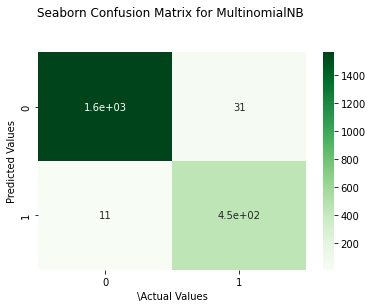

In [42]:
# Creating heatmap of confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax1 = sns.heatmap(check_matrix1, annot = True, cmap = 'Greens')
ax1.set_title('Seaborn Confusion Matrix for MultinomialNB \n\n')
ax1.set_xlabel('\Actual Values')
ax1.set_ylabel('Predicted Values')

ax1.set_xticklabels(['0', '1'])
ax1.set_yticklabels(['0', '1'])

plt.show()

In [43]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, Y_train)

GaussianNB()

In [44]:
# Evaluating Training score
model2.score(X_train, Y_train)

0.8334548991004134

In [45]:
# Testing our own calculations
predictions2 = model2.predict(X_test)
true_pos2, true_neg2, false_pos2, false_neg2, a2, p2, r2, f2 = metrics(Y_test, predictions2)

print("Accuracy: ", a2)
print("Precision: ", p2)
print("Recall: ", r2)
print("F-score: ", f2)

Accuracy:  0.6140009722897424
Precision:  0.3628099173553719
Recall:  0.9502164502164502
F-score:  0.5251196172248803


In [46]:
# Print Confusion Matrix
matrix2 = np.zeros((2, 2))
matrix2[0, 0] = int(true_neg2)
matrix2[0, 1] = int(false_pos2)
matrix2[1, 0] = int(false_neg2)
matrix2[1, 1] = int(true_pos2)

print(matrix2)

[[824. 771.]
 [ 23. 439.]]


In [47]:
# Pitting our values against sklearn values
check_matrix2 = confusion_matrix(Y_test, predictions2)
cm2 = pd.DataFrame(check_matrix2, index=['0', '1'], columns=['0', '1'])
print(cm2)

     0    1
0  824  771
1   23  439


In [48]:
chk_acc2 = accuracy_score(Y_test, predictions2)
chk_prc2 = precision_score(Y_test, predictions2)
chk_rec2 = recall_score(Y_test, predictions2)
chk_f2 = f1_score(Y_test, predictions2)

print("Sklearn Accuracy: ", chk_acc2)
print("Sklearn Precision: ", chk_prc2)
print("Sklearn Recall: ", chk_rec2)
print("Sklearn F-score: ", chk_f2)

Sklearn Accuracy:  0.6140009722897424
Sklearn Precision:  0.3628099173553719
Sklearn Recall:  0.9502164502164502
Sklearn F-score:  0.5251196172248803


In [49]:
# Evaluating Testing score
model2.score(X_test, Y_test)

0.6140009722897424

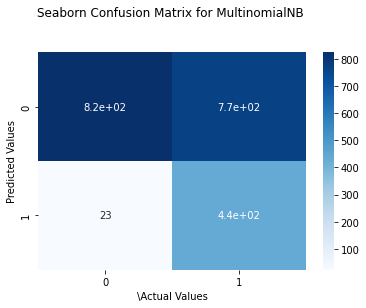

In [50]:
ax2 = sns.heatmap(check_matrix2, annot = True, cmap = 'Blues')
ax2.set_title('Seaborn Confusion Matrix for MultinomialNB \n\n')
ax2.set_xlabel('\Actual Values')
ax2.set_ylabel('Predicted Values')

ax2.set_xticklabels(['0', '1'])
ax2.set_yticklabels(['0', '1'])

plt.show()

In [51]:
# Complement NB
from sklearn.naive_bayes import ComplementNB
model3 = ComplementNB()
model3.fit(X_train, Y_train)

ComplementNB()

In [52]:
# Evaluating Training score
model3.score(X_train, Y_train)

0.973741794310722

In [53]:
# Testing our own calculations
predictions3 = model3.predict(X_test)
true_pos3, true_neg3, false_pos3, false_neg3, a3, p3, r3, f3 = metrics(Y_test, predictions3)

print("Accuracy: ", a3)
print("Precision: ", p3)
print("Recall: ", r3)
print("F-score: ", f3)

Accuracy:  0.9470102090422946
Precision:  0.818018018018018
Recall:  0.9826839826839827
F-score:  0.8928220255653884


In [54]:
# Print Confusion Matrix
matrix3 = np.zeros((2, 2))
matrix3[0, 0] = int(true_neg3)
matrix3[0, 1] = int(false_pos3)
matrix3[1, 0] = int(false_neg3)
matrix3[1, 1] = int(true_pos3)

print(matrix3)

[[1494.  101.]
 [   8.  454.]]


In [55]:
# Pitting our values against sklearn values
check_matrix3 = confusion_matrix(Y_test, predictions3)
cm3 = pd.DataFrame(check_matrix3, index=['0', '1'], columns=['0', '1'])
print(cm3)

      0    1
0  1494  101
1     8  454


In [56]:
chk_acc3 = accuracy_score(Y_test, predictions3)
chk_prc3 = precision_score(Y_test, predictions3)
chk_rec3 = recall_score(Y_test, predictions3)
chk_f3 = f1_score(Y_test, predictions3)

print("Sklearn Accuracy: ", chk_acc3)
print("Sklearn Precision: ", chk_prc3)
print("Sklearn Recall: ", chk_rec3)
print("Sklearn F-score: ", chk_f3)

Sklearn Accuracy:  0.9470102090422946
Sklearn Precision:  0.818018018018018
Sklearn Recall:  0.9826839826839827
Sklearn F-score:  0.8928220255653884


In [57]:
# Evaluating Testing score
model3.score(X_test, Y_test)

0.9470102090422946

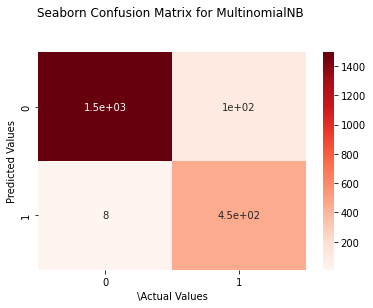

In [58]:
ax3 = sns.heatmap(check_matrix3, annot = True, cmap = 'Reds')
ax3.set_title('Seaborn Confusion Matrix for MultinomialNB \n\n')
ax3.set_xlabel('\Actual Values')
ax3.set_ylabel('Predicted Values')

ax3.set_xticklabels(['0', '1'])
ax3.set_yticklabels(['0', '1'])

plt.show()

In [59]:
# Bernoulli NB
from sklearn.naive_bayes import BernoulliNB 
model4 = BernoulliNB()
model4.fit(X_train, Y_train)

BernoulliNB()

In [60]:
# Evaluating Training score
model4.score(X_train, Y_train)

0.987478725990761

In [61]:
# Testing our own calculations
predictions4 = model4.predict(X_test)
true_pos4, true_neg4, false_pos4, false_neg4, a4, p4, r4, f4 = metrics(Y_test, predictions4)

print("Accuracy: ", a4)
print("Precision: ", p4)
print("Recall: ", r4)
print("F-score: ", f4)

Accuracy:  0.9708313077297035
Precision:  1.0
Recall:  0.8701298701298701
F-score:  0.9305555555555556


In [62]:
# Print Confusion Matrix
matrix4 = np.zeros((2, 2))
matrix4[0, 0] = int(true_neg4)
matrix4[0, 1] = int(false_pos4)
matrix4[1, 0] = int(false_neg4)
matrix4[1, 1] = int(true_pos4)

print(matrix4)

[[1595.    0.]
 [  60.  402.]]


In [63]:
# Pitting our values against sklearn values
check_matrix4 = confusion_matrix(Y_test, predictions4)
cm4 = pd.DataFrame(check_matrix4, index=['0', '1'], columns=['0', '1'])
print(cm4)

      0    1
0  1595    0
1    60  402


In [64]:
chk_acc4 = accuracy_score(Y_test, predictions4)
chk_prc4 = precision_score(Y_test, predictions4)
chk_rec4 = recall_score(Y_test, predictions4)
chk_f4 = f1_score(Y_test, predictions4)

print("Sklearn Accuracy: ", chk_acc4)
print("Sklearn Precision: ", chk_prc4)
print("Sklearn Recall: ", chk_rec4)
print("Sklearn F-score: ", chk_f4)

Sklearn Accuracy:  0.9708313077297035
Sklearn Precision:  1.0
Sklearn Recall:  0.8701298701298701
Sklearn F-score:  0.9305555555555556


In [65]:
# Evaluating Testing score
model4.score(X_test, Y_test)

0.9708313077297035

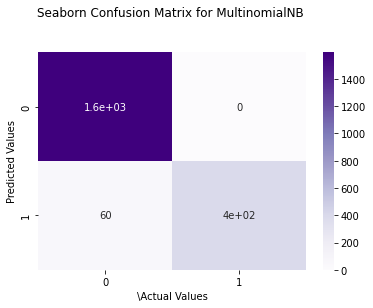

In [67]:
ax4 = sns.heatmap(check_matrix4, annot = True, cmap = 'Purples')
ax4.set_title('Seaborn Confusion Matrix for MultinomialNB \n\n')
ax4.set_xlabel('\Actual Values')
ax4.set_ylabel('Predicted Values')

ax4.set_xticklabels(['0', '1'])
ax4.set_yticklabels(['0', '1'])

plt.show()

In [74]:
# Let us try to get some assumptions for each model and see
tweet1 = 'I am sad'
tweet2 = 'Today was the best day ever'
tweet3 = 'Everything will be okay'
tweet4 = 'Hello. I am amazing'
tweet5 = 'Is it sad that I am all alone'
tweet6 = 'That is sad but I am happy'

In [78]:
# Model 1 predictions
p1 = model1.predict(vector.transform([tweet1, tweet2, tweet3, tweet4, tweet5, tweet6]))

print(p1)
print()
for index, i in enumerate(p1):
  if i == 0:
    print('Tweeter ' + str(index + 1) + ' is not depressed')
  else:
    print('Tweeter ' + str(index + 1) + ' is depressed')

[1 0 0 0 1 0]

Tweeter 1 is depressed
Tweeter 2 is not depressed
Tweeter 3 is not depressed
Tweeter 4 is not depressed
Tweeter 5 is depressed
Tweeter 6 is not depressed


In [80]:
# Model 2 predictions
p2 = model2.predict(vector.transform([tweet1, tweet2, tweet3, tweet4, tweet5, tweet6]).toarray())

print(p2)
print()
for index, i in enumerate(p2):
  if i == 0:
    print('Tweeter ' + str(index + 1) + ' is not depressed')
  else:
    print('Tweeter ' + str(index + 1) + ' is depressed')

[1 1 1 1 1 1]

Tweeter 1 is depressed
Tweeter 2 is depressed
Tweeter 3 is depressed
Tweeter 4 is depressed
Tweeter 5 is depressed
Tweeter 6 is depressed


In [81]:
# Model 3 predictions
p3 = model3.predict(vector.transform([tweet1, tweet2, tweet3, tweet4, tweet5, tweet6]))

print(p3)
print()
for index, i in enumerate(p3):
  if i == 0:
    print('Tweeter ' + str(index + 1) + ' is not depressed')
  else:
    print('Tweeter ' + str(index + 1) + ' is depressed')

[1 0 0 0 1 1]

Tweeter 1 is depressed
Tweeter 2 is not depressed
Tweeter 3 is not depressed
Tweeter 4 is not depressed
Tweeter 5 is depressed
Tweeter 6 is depressed


In [82]:
# Model 4 predictions
p4 = model4.predict(vector.transform([tweet1, tweet2, tweet3, tweet4, tweet5, tweet6]))

print(p4)
print()
for index, i in enumerate(p4):
  if i == 0:
    print('Tweeter ' + str(index + 1) + ' is not depressed')
  else:
    print('Tweeter ' + str(index + 1) + ' is depressed')

[0 0 0 0 0 0]

Tweeter 1 is not depressed
Tweeter 2 is not depressed
Tweeter 3 is not depressed
Tweeter 4 is not depressed
Tweeter 5 is not depressed
Tweeter 6 is not depressed


In [85]:
# Saving our models:
import joblib
path = 'gdrive/MyDrive/Models/'
name= 'MultinomialNB'
model_path = path + name

_a = joblib.dump(model1, model_path)

In [87]:
name= 'GaussianNB'
model_path2 = path + name

_b = joblib.dump(model2, model_path2)

In [88]:
name= 'ComplementNB'
model_path3 = path + name

_c = joblib.dump(model3, model_path3)

In [89]:
name= 'BernoulliNB'
model_path4 = path + name

_d = joblib.dump(model4, model_path4)